1. Import necesary libraries
2. Import the dataset
3. Inspect the data
4. Visualize the data
4. Fill the missing values
6. train test split
7. scaling
8. Train a Linear regression model
9. Get the coefficients and the intercepts
10. Valuation and test
11. Play with features, l1, l2, RFE, ...


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [6]:
print(df['Extracurricular Activities'].value_counts())

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


In [7]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes" : 1, "No" : 0})

df.head()

/tmp/ipython-input-2406505830.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes" : 1, "No" : 0})


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [10]:
print(df['Extracurricular Activities'].value_counts())

Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64


In [8]:
x = df.drop('Performance Index', axis = 1)
y = df['Performance Index']

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
# from sklearn.preprocessing import StandardScaler #normalization

# scaler = StandardScaler()
# xtrain_scaled = scaler.fit_transform(xtrain)
# xtest_scaled = scaler.transform(xtest)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# scaled_model = LinearRegression()

model.fit(xtrain, ytrain)
# scaled_model.fit(xtrain_scaled, ytrain)

print("coefficients of the normal model: ", model.coef_)
print("Intercepts of the normal model: ", model.intercept_)

# print("coefficients of the scaled_model: ", scaled_model.coef_)
# print("Intercepts of the scaled_modell: ", scaled_model.intercept_)

coefficients of the normal model:  [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
Intercepts of the normal model:  -33.92194621555638


In [26]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)

# ytrain_scaled_pred = model.predict(xtrain_scaled)
# ytest_scaled_pred = model.predict(xtest_scaled)

print("ytrain : ", r2_score(ytrain, ytrain_pred))
print("ytest : ", r2_score(ytest, ytest_pred))

# print("ytrain scaled : ", r2_score(ytrain, ytrain_scaled_pred))
# print("ytest scaled : ", r2_score(ytest, ytest_scaled_pred))

ytrain :  0.9886898790682355
ytest :  0.9889832909573145


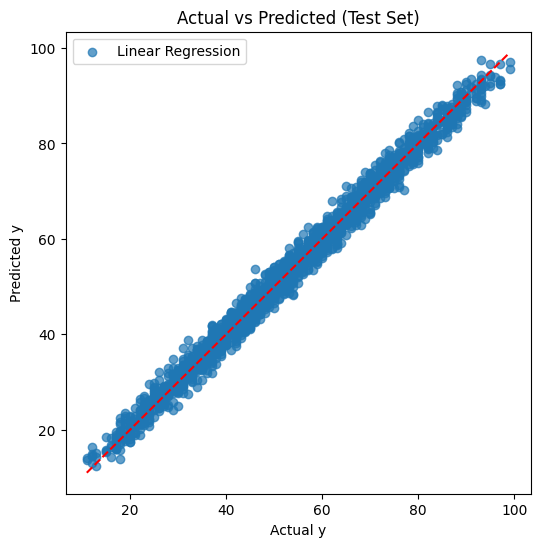

In [27]:
# 10. Compare Model Predictions on Test Set
plt.figure(figsize=(6,6))
plt.scatter(ytest, ytest_pred, alpha=0.7, label="Linear Regression")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted (Test Set)")
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "r--")
plt.legend()
plt.show()

In [28]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 1.0)
lasso = Lasso(alpha = 0.01)

ridge.fit(xtrain, ytrain)
lasso.fit(xtrain, ytrain)

print("ridge : ", r2_score(ytest, ridge.predict(xtest)))
print("lasso : ", r2_score(ytest, lasso.predict(xtest)))

ridge :  0.9889832645273239
lasso :  0.9889786714845265


In [38]:
from sklearn.feature_selection import RFE

selector = RFE(LinearRegression(), n_features_to_select=2) #forward & bacward
selector.fit(xtrain_scaled, ytrain)

RFE(estimator=LinearRegression(), n_features_to_select=2)